# Kaggle Competition

# Property Price Prediction - Advanced Regression Techniques

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing data set:
df=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Property_Price_Test.csv",index_col=0,header=0)
print(df.shape)
df.head(10)

(1459, 79)


,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RLD,75.0,10194.721200,Paved,NaN,IR1,Lvl,AllPub,C,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,SS,HdBoard,HdBoard,None,0.0,TA,TA,PC,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,TF,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RLD,NaN,15033.338140,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,SS,HdBoard,HdBoard,None,0.0,TA,Gd,PC,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,TF,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RLD,63.0,12975.123110,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RLD,85.0,22272.588650,Paved,NaN,Reg,Lvl,AllPub,I,GS,Gilbe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1455 non-null   object 
 2   Lot_Extent                 1232 non-null   float64
 3   Lot_Size                   1459 non-null   float64
 4   Road_Type                  1459 non-null   object 
 5   Lane_Type                  107 non-null    object 
 6   Property_Shape             1459 non-null   object 
 7   Land_Outline               1459 non-null   object 
 8   Utility_Type               1457 non-null   object 
 9   Lot_Configuration          1459 non-null   object 
 10  Property_Slope             1459 non-null   object 
 11  Neighborhood               1459 non-null   object 
 12  Condition1                 1459 non-null   object 
 13  Condition2                 1459 non-null   ob

In [4]:
df.describe(include="all")

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1443,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,10,6,5,7,NaN,NaN,NaN,NaN,6,4,13,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,7,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,8
top,NaN,RLD,NaN,NaN,Paved,Grvl,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,SS,VinylSd,VinylSd,None,NaN,TA,TA,PC,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,TF,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1045,1207,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1001
mean,57.378341,NaN,68.580357,9872.044418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4960.234751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,-4265.104479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN

<AxesSubplot:ylabel='Id'>

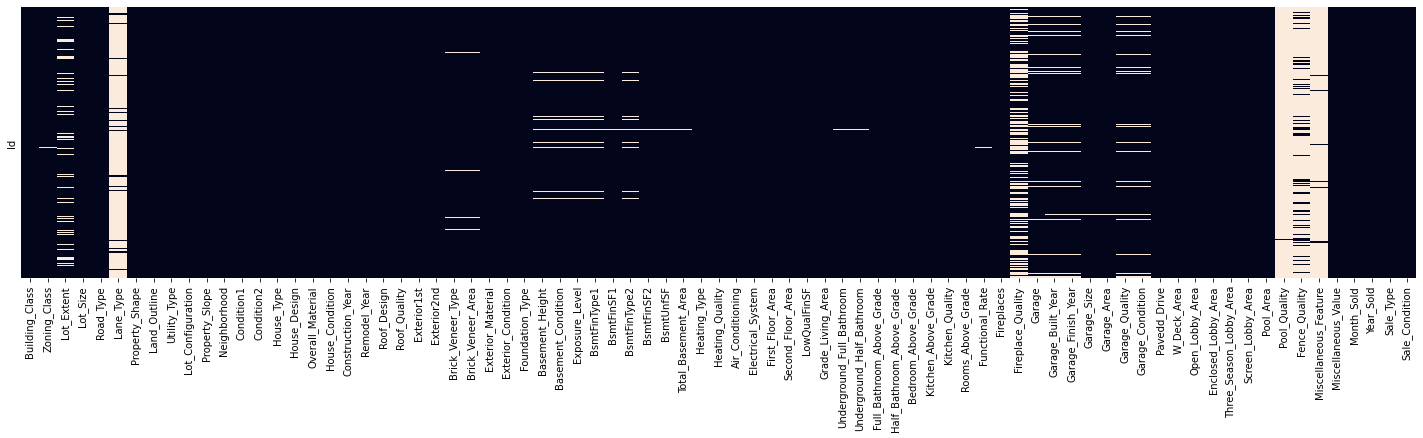

In [5]:
plt.figure(figsize=(25,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.isnull().sum()

Building_Class                  0
Zoning_Class                    4
Lot_Extent                    227
Lot_Size                        0
Road_Type                       0
Lane_Type                    1352
Property_Shape                  0
Land_Outline                    0
Utility_Type                    2
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     1
Exterior2nd                     1
Brick_Veneer_Type              16
Brick_Veneer_Area              15
Exterior_Material               0
Exterior_Condition              0
Foundation_Type                 0
Basement_Heigh

In [7]:
df.drop(["Lane_Type","Pool_Quality","Fence_Quality","Miscellaneous_Feature"],axis=1,inplace=True)

In [8]:
df["Zoning_Class"].fillna(df["Zoning_Class"].mode()[0],inplace=True)
df["Lot_Extent"].fillna(df["Lot_Extent"].mean(),inplace=True)
df["Utility_Type"].fillna(df["Utility_Type"].mode()[0],inplace=True)

In [9]:
df["Exterior1st"].fillna(df["Exterior1st"].mode()[0],inplace=True)
df["Exterior2nd"].fillna(df["Exterior2nd"].mode()[0],inplace=True)
df["Brick_Veneer_Type"].fillna(df["Brick_Veneer_Type"].mode()[0],inplace=True)

In [10]:
df["Brick_Veneer_Area"].fillna(df["Brick_Veneer_Area"].mean(),inplace=True)
df["Basement_Height"].fillna(df["Basement_Height"].mode()[0],inplace=True)
df["Basement_Condition"].fillna(df["Basement_Condition"].mode()[0],inplace=True)

In [11]:
df["Exposure_Level"].fillna(df["Exposure_Level"].mode()[0],inplace=True)
df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0],inplace=True)
df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].mean(),inplace=True)

In [12]:
df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0],inplace=True)
df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].mean(),inplace=True)
df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].mean(),inplace=True)

In [13]:
df["Total_Basement_Area"].fillna(df["Total_Basement_Area"].mean(),inplace=True)
df["Underground_Full_Bathroom"].fillna(df["Underground_Full_Bathroom"].mean(),inplace=True)
df["Underground_Half_Bathroom"].fillna(df["Underground_Full_Bathroom"].mean(),inplace=True)

In [14]:
df["Kitchen_Quality"].fillna(df["Kitchen_Quality"].mode()[0],inplace=True)
df["Functional_Rate"].fillna(df["Functional_Rate"].mode()[0],inplace=True)
df["Fireplace_Quality"].fillna(df["Fireplace_Quality"].mode()[0],inplace=True)

In [15]:
df["Garage"].fillna(df["Garage"].mode()[0],inplace=True)
df["Garage_Built_Year"].fillna(df["Garage_Built_Year"].mean(),inplace=True)
df["Garage_Finish_Year"].fillna(df["Garage_Finish_Year"].mode()[0],inplace=True)

In [16]:
df["Garage_Size"].fillna(df["Garage_Size"].mean,inplace=True)
df["Garage_Area"].fillna(df["Garage_Area"].mean,inplace=True)
df["Garage_Quality"].fillna(df["Garage_Quality"].mode()[0],inplace=True)

In [17]:
df["Garage_Condition"].fillna(df["Garage_Condition"].mode()[0],inplace=True)
df["Sale_Type"].fillna(df["Sale_Type"].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [19]:
df.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RHD,80.0,16104.819760,Paved,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RLD,81.0,15639.150810,Paved,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RLD,74.0,3849.428920,Paved,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RLD,78.0,4955.447942,Paved,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RLD,43.0,3046.604942,Paved,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,Gd,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [20]:
df.to_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Exported_data\Clean_Test_Data.csv",
          index=True,header=True)